# Auto Insurance Analysis

## Technical Notebook

## Project Goals

- Analyze auto insurance data.
- Build a logistic regression model to predict crash probability for auto insurance customers.
- Build a linear regression model to predict crash cost for auto insurance customers.
- Use model results to develop crash percentage and assign customers to new risk profiles.
- Determine cost of premiums based on risk profiles.

## Summary of Data

The dataset for this project contains 6044 records of auto insurance data. Each record
represents a customer at an auto insurance company. Using this data, we will be able to ascertain what
influences the likelihood of a car crash. Then subsequently, we will be able to determine the cost to resolve a claim. The data in this project is the typical type of corporate data you would receive from a company in the insurance field-- a typical flat file from client records.

### Library Import

In [14]:
#Import libraries
%run ../python_files/imports

### Data Import

In [15]:
%run ../python_files/auto_insurance_eda

['kidsdriv', 'age', 'homekids', 'yoj', 'income', 'parent1', 'home_val', 'mstatus', 'sex', 'education', 'job', 'car_use', 'car_type', 'red_car', 'oldclaim', 'clm_freq', 'revoked', 'mvr_pts', 'car_age', 'urbanicity', 'tif_log', 'bluebook_log', 'travtime_log']


## Modeling

### Logistic Regression Model

Here, we are building a logistic regression model to predict crash probability for auto insurance customers.

##### Model Implementation

In [16]:
logit_model = sm.Logit(y_train_log, x_train_log)
logit_result = logit_model.fit()
print(logit_result.summary2())

Optimization terminated successfully.
         Current function value: 0.456787
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.211      
Dependent Variable: crash            AIC:              4449.1279  
Date:               2020-01-22 20:02 BIC:              4552.8661  
No. Observations:   4835             Log-Likelihood:   -2208.6    
Df Model:           15               LL-Null:          -2799.5    
Df Residuals:       4819             LLR p-value:      1.2853e-242
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
kidsdriv       0.3073    0.0698    4.4039  0.0000   0.1705   0.4440
parent1        0.3918    0.1182    3.3154  0.0009

##### Model Fitting

In [17]:
logreg_model = LogisticRegression()
logreg_model.fit(x_train_log, y_train_log)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predicting Test Set Results and Calculating Accuracy

In [18]:
y_pred_log = logreg.predict(x_test_log)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test_log, y_test_log)))

Accuracy of logistic regression classifier on test set: 0.78


##### Confusion Matrix

In [19]:
confusion_matrix = confusion_matrix(y_test_log, y_pred_log)
print(confusion_matrix)

[[830  63]
 [200 116]]


##### Interpretation of Results

In [20]:
print(classification_report(y_test_log, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       893
           1       0.65      0.37      0.47       316

    accuracy                           0.78      1209
   macro avg       0.73      0.65      0.67      1209
weighted avg       0.76      0.78      0.76      1209



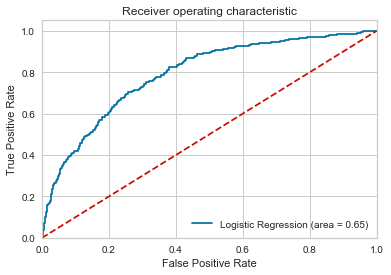

In [21]:
# ROC Curve

logit_roc_auc = roc_auc_score(y_test_log, logreg.predict(x_test_log))
fpr, tpr, thresholds = roc_curve(y_test_log, logreg.predict_proba(x_test_log)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Linear Regression Model

Here, we are building a linear regression model to predict crash cost for auto insurance customers.

##### Model Implementation

In [24]:
linear_model = sm.OLS(y_train_lin, x_train_lin)
linear_result = linear_model.fit()
print(linear_result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.149     
Dependent Variable:     crash_cost       AIC:                         95191.9327
Date:                   2020-01-22 20:14 BIC:                         95341.0564
No. Observations:       4835             Log-Likelihood:              -47573.   
Df Model:               23               F-statistic:                 37.81     
Df Residuals:           4812             Prob (F-statistic):          1.95e-154 
R-squared (uncentered): 0.153            Scale:                       2.0696e+07
----------------------------------------------------------------------------------
                     Coef.     Std.Err.      t      P>|t|      [0.025      0.975] 
----------------------------------------------------------------------------------
kidsdriv            243.9663   144.5542    1.6877   0.0915    -39.4259    527.3586
age                  -3.4762     8.6857   -0.

##### Model Fitting

In [25]:
linreg_model = LinearRegression()
linreg_model.fit(x_train_lin, y_train_lin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Results

In [26]:
#Calculate r-squared value

y_pred_lin = linreg_model.predict(x_test_lin)
print('Linear Regression R squared": %.4f' % linreg_model.score(x_test_lin, y_test_lin))

Linear Regression R squared": 0.0570


In [27]:
#Calculate root mean squared error (RMSE) value

mse_lin = mean_squared_error(y_pred_lin, y_test_lin)
rmse_lin = np.sqrt(mse_lin)
print('Linear Regression RMSE: %.4f' % rmse_lin)

Linear Regression RMSE: 3814.3257


In [28]:
#Calculate mean absolute error (MAE) value

mae_lin = mean_absolute_error(y_pred_lin, y_test_lin)
print('Linear Regression MAE: %.4f' % mae_lin)

Linear Regression MAE: 1848.5311


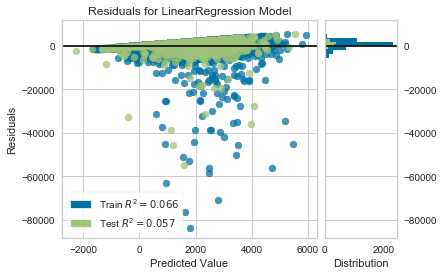

In [29]:
#Plot of Residuals

visualizer = ResidualsPlot(linreg_model)
visualizer.fit(x_train_lin, y_train_lin)  # Fit the training data to the visualizer
visualizer.score(x_test_lin, y_test_lin)  # Evaluate the model on the test data
visualizer.show()                         # Finalize and render the plot of residuals

## Results and Conclusions

compare crash_percentage vs crash_cost